### Maxwell A. Fine 14880725
### Assingment 1: Stastical Methods in Astrophysics

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits
import scipy.stats as sps
import corner # corner plot


/home/afinemax/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### reconmened pre-assingment data processing as given in A1 handout

In [2]:
dr3stars = fits.open('gaiadr3_cluster_stars.fits')
dr3stars.info()
print(dr3stars[1].columns)
stars = pd.DataFrame(dr3stars[1].data)
stars['Name'] = stars['Name'].str.strip()

clcounts = stars.groupby(['Name']).size().reset_index(name='count')

Filename: gaiadr3_cluster_stars.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      93   ()      
  1  members.dat    1 TableHDU       331   1291929R x 56C   [A20, I4, I19, I1, F10.8, F12.8, F10.8, F12.8, F10.8, F12.8, E11.4, E11.4, F10.8, E11.4, F10.8, E11.4, F10.8, F11.8, F11.8, E11.4, E11.4, E11.4, E11.4, E11.4, E11.4, I2, F12.8, F10.7, F11.8, F10.8, F19.8, F16.8, F18.8, F17.8, F18.8, F17.8, F10.7, F10.7, F10.7, E11.4, E11.4, E11.4, E9.3, F12.8, F4.1, F6.1, F5.1, F11.7, F11.8, F6.1, F12.7, F13.8, F5.1, A13, I1, I1]   


ColDefs(
    name = 'Name'; format = 'A20'; start = 1
    name = 'ID'; format = 'I4'; disp = 'I4'; start = 22
    name = 'GaiaDR3'; format = 'I19'; disp = 'I19'; start = 27
    name = 'inrt'; format = 'I1'; disp = 'I1'; start = 47
    name = 'Prob'; format = 'F10.8'; disp = 'F10.8'; start = 49
    name = 'RAdeg'; format = 'F12.8'; unit = 'deg'; disp = 'F12.8'; start = 60
    name = 'e_RAdeg'; format = 'F10.8'; unit = 'arcsec'; disp = 'F10.8'; start = 73
    name = 'DEdeg'; format = 'F12.8'; unit = 'deg'; disp = 'F12.8'; start = 84
    name = 'e_DEdeg'; format = 'F10.8'; unit = 'arcsec'; disp = 'F10.8'; start = 97
    name = 'GLON'; format = 'F12.8'; unit = 'deg'; disp = 'F12.8'; start = 108
    name = 'GLAT'; format = 'E11.4'; unit = 'deg'; disp = 'E11.4'; start = 121
    name = 'pmRA'; format = 'E11.4'; unit = 'mas/yr'; disp = 'E11.4'; start = 133
    name = 'e_pmRA'; format = 'F10.8'; unit = 'mas/yr'; disp = 'F10.8'; start = 145
    name = 'pmDE'; format = 'E11.4'; unit = 'mas/yr'; d

### Task 1:

The parameter Prob gives a conservative estimate of the probability that the star is associated with
the cluster, by doing a ‘clustering’3 analysis of the stars in the 5-dimensional astrometric parameter
space, i.e. using RAdeg, DEdeg, Plx, pmRA and pmDE. Use the Pandas sample function on your
cluster star counts dataframe, to randomly select 4 clusters, only from clusters with >1000 candidate
stars. Split each cluster into two subsamples corresponding to stars with Prob ≤ 0.8 and stars with
Prob > 0.8 and for each cluster, make a scatter plot matrix (see the extras episode) to show on the
same figure the data points for both subsamples on this 5-D parameter space. Note that it is fine to 


### Idea & Assumptions 

* We can use the pandas sample function to randomly select 4 clusters, from clusters with >1000 stars which we can simply slice for. 
    - The col name we are looking for is 'name' this represents the cluster names
        * this is what the starter code does!
    - then slice 
    - then randomly pick

* Next we can slice again to split the clusters into Prob ≤ 0.8 and stars with
Prob > 0.8 and for each cluster.

* First time using Pandas so I a assuming we can slice easily

* No idea what a scatter plot matrix is so, we will have to look at the extras episode before attemptng to plot

* To test my code if it works as expected, we will be using a pre-determined seed for pd.sample



### Task 1: coding cell below

In [3]:
# task 1 code

# Set a seed for reproducibility
random_seed = 42




# Filter names with more than 1000 entries
clusters_over_1000 = clcounts[clcounts['count'] > 1000]

# Randomly pick 4 names with more than 1000 entries
randomly_picked_clusters = clusters_over_1000.sample(n=4, random_state=random_seed)

# print for user
print('Randomly Picked Clusters\n', randomly_picked_clusters, '\n')


# for loop to split each cluster by Prob ≤ 0.8
df_high = []
df_low = []

for index, cluster in randomly_picked_clusters.iterrows():

    # Create an empty DataFrame with desired columns
    result_high_df = pd.DataFrame(columns=['Name', 'Higher_8_Prob',
                                    'Lower_8_Prob', 'RAdeg', 'DEdeg',
                                    'Plx', 'pmRA' , 'pmDE'])

    result_low_df = pd.DataFrame(columns=['Name', 'Higher_8_Prob',
                                    'Lower_8_Prob', 'RAdeg', 'DEdeg',
                                    'Plx', 'pmRA' , 'pmDE'])

    # sort and slice data
    cluster_name= cluster['Name']
    clustter_data = stars[stars['Name'] == cluster_name]
    higher_8_prob = clustter_data[clustter_data['Prob'] > 0.8]
    lower_8_prob = clustter_data[clustter_data['Prob'] <= 0.8]

    # Add to DataFrames
    result_high_df = result_high_df.append({
        'Name': cluster_name,
        'Higher_8_Prob': higher_8_prob,
        'Lower_8_Prob': lower_8_prob,
        'RAdeg': higher_8_prob['RAdeg'],
        'DEdeg': higher_8_prob['DEdeg'],
        'Plx': higher_8_prob['Plx'],
        'pmRA': higher_8_prob['pmRA'],
        'pmDE': higher_8_prob['pmDE'],
        }, ignore_index=True)

    result_low_df = result_low_df.append({
        'Name': cluster_name,
        'Higher_8_Prob': higher_8_prob,
        'Lower_8_Prob': lower_8_prob,
        'RAdeg': lower_8_prob['RAdeg'],
        'DEdeg': lower_8_prob['DEdeg'],
        'Plx': lower_8_prob['Plx'],
        'pmRA': lower_8_prob['pmRA'],
        'pmDE': lower_8_prob['pmDE'],
         }, ignore_index=True)

    df_high.append(result_high_df)
    df_low.append(result_low_df)
    # no need to do this list stuff! its already accounted for




Randomly Picked Clusters
                Name  count
4746       NGC_6475   1427
1327  Collinder_261   3071
4565       NGC_2506   2465
4553       NGC_2447   1043 



AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
# task 1 code

# Set a seed for reproducibility
random_seed = 42




# Filter names with more than 1000 entries
clusters_over_1000 = clcounts[clcounts['count'] > 1000]

# Randomly pick 4 names with more than 1000 entries
randomly_picked_clusters = clusters_over_1000.sample(n=4, random_state=random_seed)

# print for user
print('Randomly Picked Clusters\n', randomly_picked_clusters, '\n')


# for loop to split each cluster by Prob ≤ 0.8
df_high = []
df_low = []

for index, cluster in randomly_picked_clusters.iterrows():

    # Create an empty DataFrame with desired columns
    result_high_df = pd.DataFrame(columns=['Name', 'Higher_8_Prob',
                                    'Lower_8_Prob', 'RAdeg', 'DEdeg',
                                    'Plx', 'pmRA' , 'pmDE'])

    result_low_df = pd.DataFrame(columns=['Name', 'Higher_8_Prob',
                                    'Lower_8_Prob', 'RAdeg', 'DEdeg',
                                    'Plx', 'pmRA' , 'pmDE'])

    # sort and slice data
    cluster_name= cluster['Name']
    clustter_data = stars[stars['Name'] == cluster_name]
    higher_8_prob = clustter_data[clustter_data['Prob'] > 0.8]
    lower_8_prob = clustter_data[clustter_data['Prob'] <= 0.8]

    # Add to DataFrames
    # Replace append with concat
    result_high_df = pd.concat([result_high_df, pd.DataFrame({
        'Name': [cluster_name],
        'Higher_8_Prob': [higher_8_prob.shape[0]],
        'Lower_8_Prob': [lower_8_prob.shape[0]],
        'RAdeg': [higher_8_prob['RAdeg'].tolist()],
        'DEdeg': [higher_8_prob['DEdeg'].tolist()],
        'Plx': [higher_8_prob['Plx'].tolist()],
        'pmRA': [higher_8_prob['pmRA'].tolist()],
        'pmDE': [higher_8_prob['pmDE'].tolist()],
    })], ignore_index=True)

    result_low_df = pd.concat([result_low_df, pd.DataFrame({
        'Name': [cluster_name],
        'Higher_8_Prob': [higher_8_prob.shape[0]],
        'Lower_8_Prob': [lower_8_prob.shape[0]],
        'RAdeg': [lower_8_prob['RAdeg'].tolist()],
        'DEdeg': [lower_8_prob['DEdeg'].tolist()],
        'Plx': [lower_8_prob['Plx'].tolist()],
        'pmRA': [lower_8_prob['pmRA'].tolist()],
        'pmDE': [lower_8_prob['pmDE'].tolist()],
    })], ignore_index=True)


    df_high.append(result_high_df)
    df_low.append(result_low_df)
    # no need to do this list stuff! its already accounted for




Randomly Picked Clusters
                Name  count
4746       NGC_6475   1427
1327  Collinder_261   3071
4565       NGC_2506   2465
4553       NGC_2447   1043 



### Task 1: plotting cell below

/home/afinemax/anaconda3/lib/python3.9/site-packages/scipy/stats/_multivariate.py:653: RuntimeWarning: covariance is not positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)


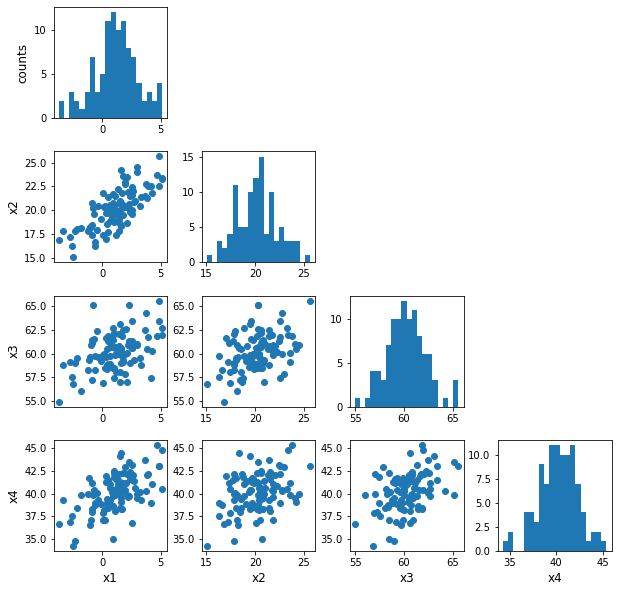

In [ ]:
rand_data = sps.multivariate_normal.rvs(mean=[1,20,60,40], cov=[[3,2,1,3],[2,2,1,4],[1,1,3,2],[3,4,2,1]], size=100)
ndims = rand_data.shape[1]
labels = ['x1','x2','x3','x4']
fig, axes = plt.subplots(4,4,figsize=(10,10))
fig.subplots_adjust(wspace=0.3,hspace=0.3)
for i in range(ndims): ## y dimension of grid
    for j in range(ndims): ## x dimension of grid
        if i == j:
            axes[i,j].hist(rand_data[:,i], bins=20)
        elif i > j:
            axes[i,j].scatter(rand_data[:,j], rand_data[:,i])
        else:
            axes[i,j].axis('off')
        if j == 0:
            if i == j:
                axes[i,j].set_ylabel('counts',fontsize=12)
            else:
                axes[i,j].set_ylabel(labels[i],fontsize=12)
        if i == 3:
            axes[i,j].set_xlabel(labels[j],fontsize=12)    
plt.show()

In [ ]:
plotting_df[labels[i]].values

array([764018    267.638361
       764041    269.333915
       764062    269.292899
       764119    267.782936
       764121    267.891497
                    ...
       765381    268.417116
       765382    268.381246
       765383    268.133843
       765386    268.016364
       765387    267.975590
       Name: RAdeg, Length: 265, dtype: float64,
       115830    189.573034
       115833    189.609848
       115834    189.633471
       115845    189.613897
       115849    189.617512
                    ...
       118862    189.552829
       118880    189.549636
       118885    189.538466
       118892    189.541870
       118895    189.544433
       Name: RAdeg, Length: 367, dtype: float64,
       426602    119.993903
       426604    120.006512
       426610    119.993447
       426613    120.030959
       426621    120.022386
                    ...
       428997    120.001313
       429026    120.043012
       429034    120.029393
       429036    120.026999
       429054    1

In [ ]:
df_high[-1]

,Name,Higher_8_Prob,Lower_8_Prob,RAdeg,DEdeg,Plx,pmRA,pmDE
0,NGC_6475,Name ID GaiaDR3 i...,Name ID GaiaDR3 i...,764018 267.638361 764041 269.333915 7640...,764018 -34.474517 764041 -34.890548 764062...,764018 3.577 764041 3.544 764062 3.58...,764018 3.584 764041 3.648 764062 3.41...,764018 -5.460 764041 -5.229 764062 -5.01...
1,Collinder_261,Name ID GaiaD...,Name ID GaiaD...,115830 189.573034 115833 189.609848 1158...,115830 -68.375094 115833 -68.370657 115834...,115830 0.3385 115833 0.3137 115834 0....,115830 -6.358 115833 -6.391 115834 -6.48...,115830 -2.545 115833 -2.712 115834 -2.77...
2,NGC_2506,Name ID GaiaDR3 i...,Name ID GaiaDR3 i...,426602 119.993903 426604 120.006512 4266...,426602 -10.736505 426604 -10.730166 426610...,426602 0.2819 426604 0.2821 426610 0....,426602 -2.499 426604 -2.539 426610 -2.57...,426602 4.054 426604 4.057 426610 4.05...
3,NGC_2447,Name ID GaiaDR3 i...,Name ID GaiaDR3 i...,419432 116.118793 419433 116.107188 4194...,419432 -23.821055 419433 -23.831362 419435...,419432 1.0240 419433 1.0130 419435 0....,419432 -3.708 419433 -3.668 419435 -3.46...,419432 5.157 419433 5.181 419435 5.06...


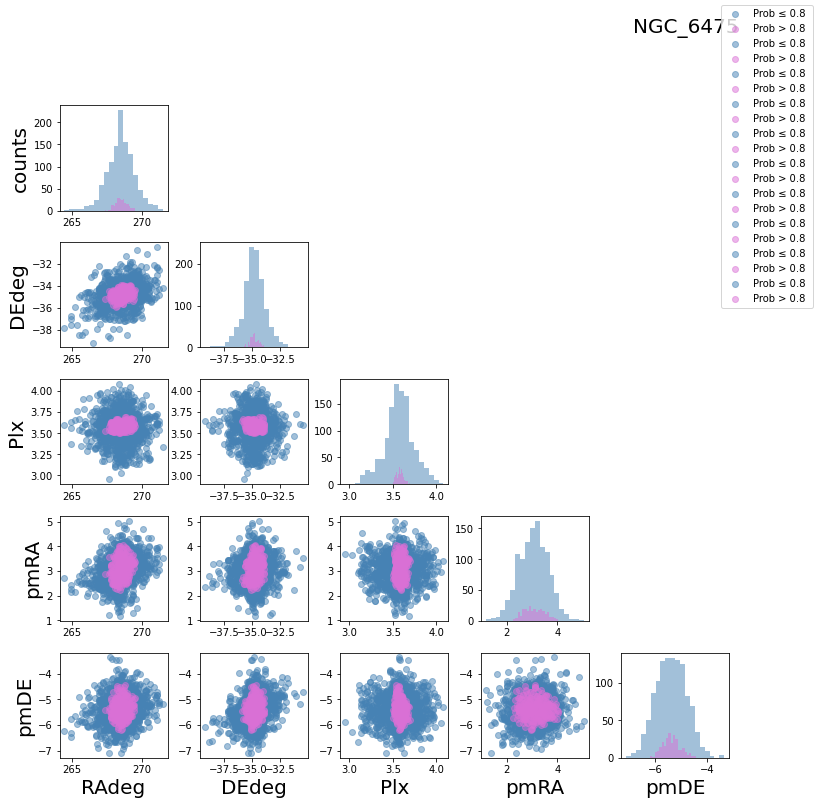

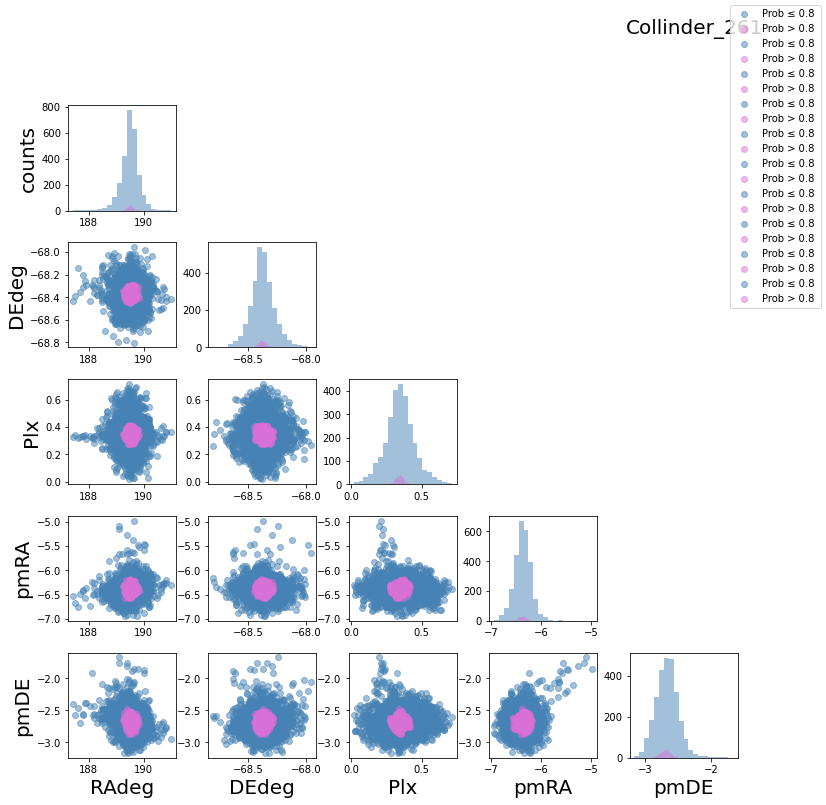

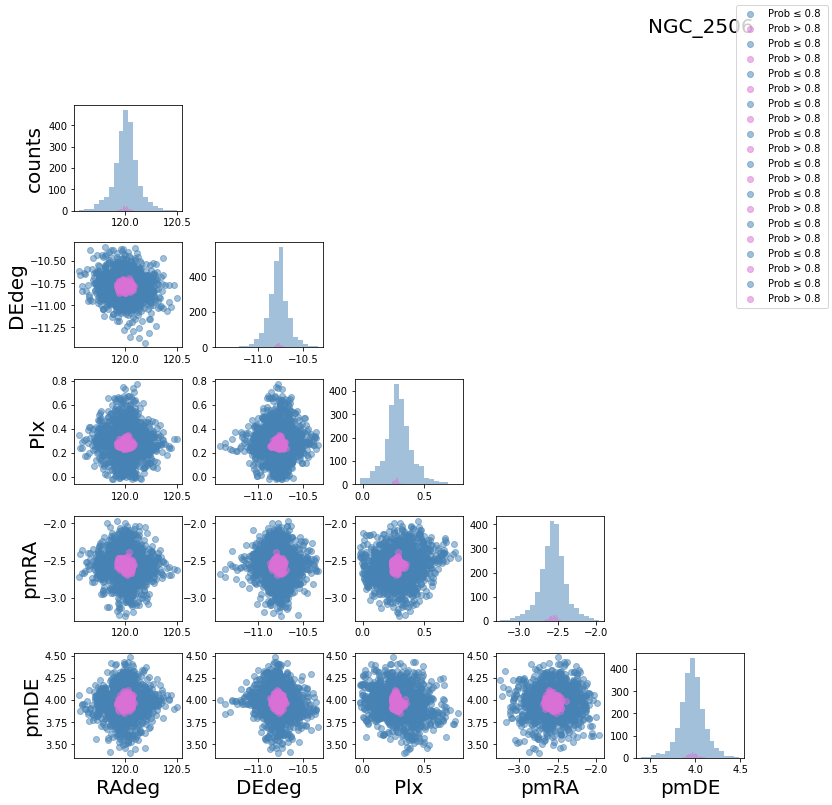

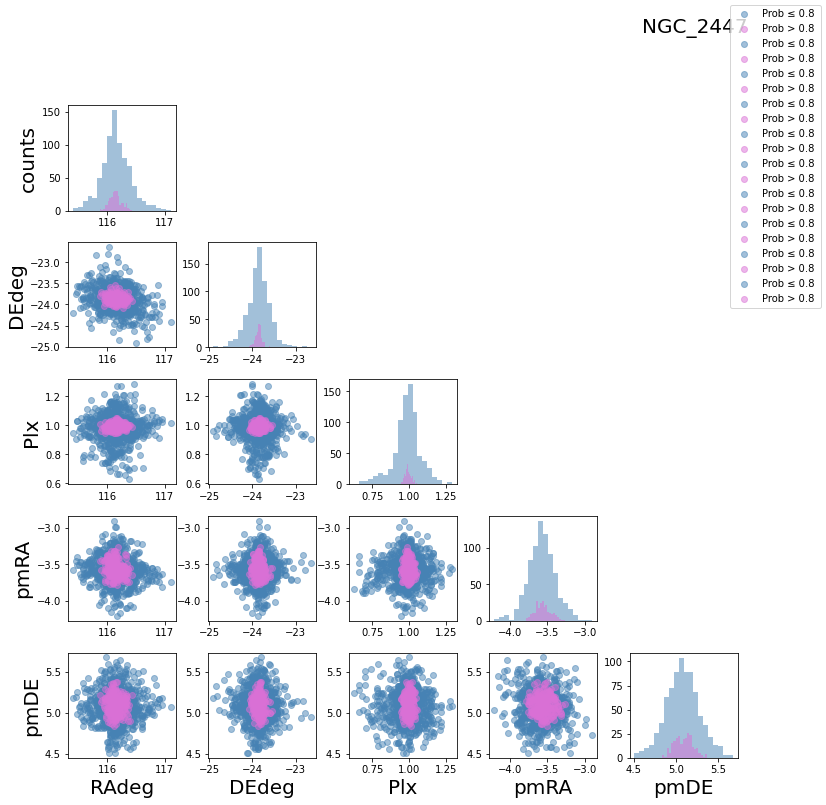

In [ ]:
ndims = len(['RAdeg', 'DEdeg', 'Plx', 'pmRA', 'pmDE'])
labels = ['RAdeg', 'DEdeg', 'Plx', 'pmRA', 'pmDE']



k=1
 # change later
color_high = 'orchid'
color_low = 'steelblue'

for k in range(len(df_low)):
    fig, axes = plt.subplots(ndims, ndims, figsize=(12, 12))
    fig.subplots_adjust(wspace=0.3, hspace=0.3)
    plotting_df = df_low[k] 
    for i in range(ndims):  # y dimension of the grid
        for j in range(ndims):  # x dimension of the grid
            if i == j:
                
                axes[i, j].hist(plotting_df[labels[i]].values, bins=20, color=color_low, alpha=0.5)
            elif i > j:
        
                axes[i, j].scatter(plotting_df[labels[j]].values[0], plotting_df[labels[i]].values[0], color=color_low, alpha=0.5, label='Prob ≤ 0.8')
            else:
                axes[i, j].axis('off')

            if j == 0:
                if i == j:
                    axes[i, j].set_ylabel('counts', fontsize=20)
                else:
                    axes[i, j].set_ylabel(labels[i], fontsize=20)

            if i == ndims - 1:
                axes[i, j].set_xlabel(labels[j], fontsize=20)

    plotting_df = df_high[k]
    for i in range(ndims):  # y dimension of the grid
        for j in range(ndims):  # x dimension of the grid
            if i == j:
                
                axes[i, j].hist(plotting_df[labels[i]].values, bins=20, color=color_high, alpha=0.5)
            elif i > j:
                axes[i, j].scatter(plotting_df[labels[j]].values[0], plotting_df[labels[i]].values[0], color=color_high, alpha=0.5, label='Prob > 0.8 ')
            else:
                axes[i, j].axis('off')

            if j == 0:
                if i == j:
                    axes[i, j].set_ylabel('counts', fontsize=20)
                else:
                    axes[i, j].set_ylabel(labels[i], fontsize=20)

            if i == ndims - 1:
                axes[i, j].set_xlabel(labels[j], fontsize=20)

    fig.legend()
    plt.suptitle(plotting_df['Name'][0], size=20, x=0.85)
    #plt.savefig('max_1.1_wip.png')
    plt.show()


### Explain: what is the likely reason for the differences between the distributions of points shown by each subsample?

### Task 2:

An interesting question is whether there is any spatial (RA and Dec) variation of the other astrometric
and photometric parameters in each cluster Now:
a. Select a cluster from your sample (your choice but you can randomly select from the clusters
if you wish) and split it into 2 subsamples in RA, corresponding to stars with RA: i) greater
than the mean RA, ii) less than the mean RA. Do the same for Dec, to create 2 subsamples
selected on Dec. Then for the RA-selected subsamples, plot a figure with 5 separate subplots
(e.g. side-by-side) which show the histograms of the following parameters for each of the 2
subsamples: Plx, pmRA, pmDE, Gmag and BP-RP. I.e. each subplot will show two
histograms, one for each subsample, so you can compare the distributions for stars on one
side of the cluster vs the other. Repeat this for the 2 subsamples selected on Dec.
b. Use t-tests to compare the 2 subsamples in RA and then the 2 subsamples in Dec for the
following parameters: Plx, pmRA, pmDE, Gmag and BP-RP. For the t-test you can assume
populations with the same variance.
I.e. you will do 5 t-tests for the subsamples selected on RA and 5 for the subsamples selected
on Dec, to see if there is any evidence that the populations of stars which each subsample is
drawn from is different from the other subsample, i.e. does it change with position in the
cluster?
c. Comment on the implications of your test results, and repeat the same procedure for two
other clusters. Based on the parameter distributions, is the t-test an appropriate test in all
cases?

### Task 2: Starter Code

In [ ]:
stars_hiprob = stars[stars.Prob > 0.8]
clusters_hiprob = stars_hiprob.groupby(['Name']).size().reset_index(name='count')
clusters_sd_hiprob = stars_hiprob.groupby(['Name']).std(numeric_only=True).reset_index()
clusters_hiprob['sd_RAdeg'] = clusters_sd_hiprob['RAdeg']
clusters_hiprob['sd_DEdeg'] = clusters_sd_hiprob['DEdeg']